In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('insurance_cleaned.csv')
df.rename(columns={'sex_female':'sex'}, inplace=True)
df.rename(columns={'smoker_no':'smoker'}, inplace=True)
df.head()

,Unnamed: 0,age,bmi,children,charges,sex,sex_male,smoker,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92,1,0,0,1,0,0,0,1
1,1,18,33.770,1,1725.55,0,1,1,0,0,0,1,0
2,2,28,33.000,3,4449.46,0,1,1,0,0,0,1,0
3,3,33,22.705,0,21984.47,0,1,1,0,0,1,0,0
4,4,32,28.880,0,3866.86,0,1,1,0,0,1,0,0


In [3]:
df = df.drop(columns='Unnamed: 0')
df.head()

,age,bmi,children,charges,sex,sex_male,smoker,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.86,0,1,1,0,0,1,0,0


In [4]:
df.describe()

,age,bmi,children,charges,sex,sex_male,smoker,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422280,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011272,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287500,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.030000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.915000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.430000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
charges             1338 non-null float64
sex                 1338 non-null int64
sex_male            1338 non-null int64
smoker              1338 non-null int64
smoker_yes          1338 non-null int64
region_northeast    1338 non-null int64
region_northwest    1338 non-null int64
region_southeast    1338 non-null int64
region_southwest    1338 non-null int64
dtypes: float64(2), int64(10)
memory usage: 125.5 KB


In [6]:
# Convert all column values to the float type to make the values compatible with StandardScalar()

df['age'] = df.age.astype(float)
df['children'] = df.children.astype(float)
df['sex_female'] = df.bmi.astype(float)
df['sex_male'] = df.age.astype(float)
df['smoker_no'] = df.age.astype(float)
df['smoker_yes'] = df.age.astype(float)
df['region_northeast'] = df.age.astype(float)
df['region_northwest'] = df.age.astype(float)
df['region_southeast'] = df.age.astype(float)
df['region_southwest'] = df.age.astype(float)

df.dtypes

age                 float64
bmi                 float64
children            float64
charges             float64
sex                   int64
sex_male            float64
smoker                int64
smoker_yes          float64
region_northeast    float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
sex_female          float64
smoker_no           float64
dtype: object

In [7]:
# Assign X to the independent variables we will use and assign y to the dependent variable that we will be trying to predict

X = df[['age', 'bmi', 'children', 'sex_female', 'smoker_no', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1338, 9) (1338, 1)


In [8]:
# Split the data into training data and testing data

from sklearn.model_selection import train_test_split

# Set the random_state to 42 to validate processing over multiple runs of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [10]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [11]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

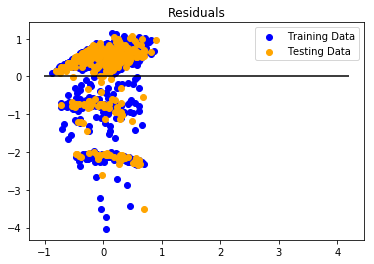

In [12]:
# Make predictions using the X_test_scaled data
# Plot X_test_scaled vs y_test_scaled
# Create a scatter plot to visualize the relationships of y_test_scaled vs predictions

# Plot both training data and testing data residuals on the same graph

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residuals")
plt.show()

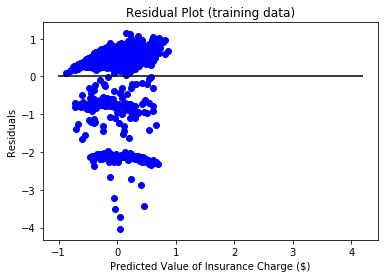

In [13]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue")
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot (training data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

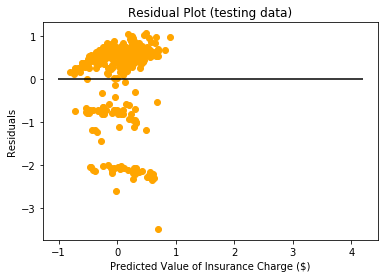

In [14]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange")
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot (testing data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

In [15]:
# Use X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9075562333874532, R2: 0.12733317433736002


In [16]:
# LASSO model

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9075760903418219, R2: 0.12731408074877704


In [17]:
# Ridge model

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9075562019475326, R2: 0.12733320456862796


In [18]:
# ElasticNet model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9074921847239236, R2: 0.12739476076234846


In [19]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[0.04522779 0.08292237 0.06545186 0.08292237 0.04522779 0.04522779
  0.04522779 0.04522779 0.04522779]]
y-axis intercept:  [-9.54883418e-17]
